# Final Capstone Project to achieve the Coursera IBM Data Science qualification

## Import all libraries to use (copied from the Data lab)

In [204]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files


#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install folium
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### Convert a table into a pandas dataframe and print it out

In [212]:
df = pd.read_html('https://en.wikipedia.org/wiki/Districts_of_Barcelona')[3]
df

,Number,District,Size km2,Population,Density inhabitants/km2,Neighbourhoods,Councilman[2],Party
0,1,Ciutat Vella,4.49,111290,24786,"La Barceloneta, El Gòtic, El Raval, Sant Pere,...",Jordi Rabassa i Massons,Barcelona en Comú
1,2,Eixample,7.46,262485,35586,"L'Antiga Esquerra de l'Eixample, La Nova Esque...",Jordi Martí Grau,Barcelona en Comú
2,3,Sants-Montjuïc,21.35,177636,8321,"La Bordeta, la Font de la Guatlla, Hostafrancs...",Marc Serra Solé,Barcelona en Comú
3,4,Les Corts,6.08,82588,13584,"les Corts, la Maternitat i Sant Ramon, Pedralbes",Xavier Marcé Carol,Socialists' Party of Catalonia
4,5,Sarrià-Sant Gervasi,20.09,140461,6992,"El Putget i Farró, Sarrià, Sant Gervasi - la B...",Albert Batlle i Bastardas,Socialists' Party of Catalonia
5,6,Gràcia,4.19,120087,28660,"Vila de Gràcia, el Camp d'en Grassot i Gràcia ...",Eloi Badia i Casas,Barcelona en Comú
6,7,Horta-Guinardó,11.96,169920,14217,"El Baix Guinardó, El Guinardó, Can Baró, El Ca...",Rosa Alarcón,Socialists' Party of Catalonia
7,8,Nou Barris,8.04,164981,20520,"Can Peguera, Canyelles, Ciutat Meridiana, La G...",Marga Marí-Klose,Socialists' Party of Catalonia
8,9,Sant Andreu,6.56,142598,21737,"Baró de Viver, Bon Pastor, El Congrés i els In...",Lucía Martín González,Barcelona en Comú
9,10,Sant Martí,10.80,221029,20466,"El Besòs i el Maresme, el Clot, El Camp de l'A...",David Escudé Rodríguez,Socialists' Party of Catalonia


### drop the unnecessary columns like population, etc. and print the final dataframe

In [213]:
df.drop("Size km2", axis=1, inplace=True)
df.drop("Population", axis=1, inplace=True)
df.drop("Density inhabitants/km2", axis=1, inplace=True)
df.drop("Councilman[2]", axis=1, inplace=True)
df.drop("Party", axis=1, inplace=True)
df


,Number,District,Neighbourhoods
0,1,Ciutat Vella,"La Barceloneta, El Gòtic, El Raval, Sant Pere,..."
1,2,Eixample,"L'Antiga Esquerra de l'Eixample, La Nova Esque..."
2,3,Sants-Montjuïc,"La Bordeta, la Font de la Guatlla, Hostafrancs..."
3,4,Les Corts,"les Corts, la Maternitat i Sant Ramon, Pedralbes"
4,5,Sarrià-Sant Gervasi,"El Putget i Farró, Sarrià, Sant Gervasi - la B..."
5,6,Gràcia,"Vila de Gràcia, el Camp d'en Grassot i Gràcia ..."
6,7,Horta-Guinardó,"El Baix Guinardó, El Guinardó, Can Baró, El Ca..."
7,8,Nou Barris,"Can Peguera, Canyelles, Ciutat Meridiana, La G..."
8,9,Sant Andreu,"Baró de Viver, Bon Pastor, El Congrés i els In..."
9,10,Sant Martí,"El Besòs i el Maresme, el Clot, El Camp de l'A..."


In [215]:
# if we wanted to delete a number of letters before the district name starts
# for example "District 1 - Ciutat Vella" 
# we would drop 13 letters
# df["District"]=df["District"].str[13:]



In [218]:
df.head(12)


,Number,District,Neighbourhoods
0,1,Ciutat Vella,"La Barceloneta, El Gòtic, El Raval, Sant Pere,..."
1,2,Eixample,"L'Antiga Esquerra de l'Eixample, La Nova Esque..."
2,3,Sants-Montjuïc,"La Bordeta, la Font de la Guatlla, Hostafrancs..."
3,4,Les Corts,"les Corts, la Maternitat i Sant Ramon, Pedralbes"
4,5,Sarrià-Sant Gervasi,"El Putget i Farró, Sarrià, Sant Gervasi - la B..."
5,6,Gràcia,"Vila de Gràcia, el Camp d'en Grassot i Gràcia ..."
6,7,Horta-Guinardó,"El Baix Guinardó, El Guinardó, Can Baró, El Ca..."
7,8,Nou Barris,"Can Peguera, Canyelles, Ciutat Meridiana, La G..."
8,9,Sant Andreu,"Baró de Viver, Bon Pastor, El Congrés i els In..."
9,10,Sant Martí,"El Besòs i el Maresme, el Clot, El Camp de l'A..."


### shape function shows us the number of rows and columns the matrix consists of, 10 rows, 3 colums

In [221]:
df.shape


(10, 3)

In [223]:
# we do not have to use the conda environment since we completed the labs before
# !conda install -c conda-forge geopy --yes



In [229]:
# convert adresses into lats and longs
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Barcelona_food")

# add lats and longs to the df
df['Major_Dist_Coord']= df['District'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))

df[['Latitude', 'Longitude']] = df['Major_Dist_Coord'].apply(pd.Series)
df.drop(['Major_Dist_Coord'], axis=1, inplace=True)

# print the final dataframe
df

,Number,District,Neighbourhoods,Latitude,Longitude
0,1,Ciutat Vella,"La Barceloneta, El Gòtic, El Raval, Sant Pere,...",41.374985,2.173277
1,2,Eixample,"L'Antiga Esquerra de l'Eixample, La Nova Esque...",41.393689,2.163655
2,3,Sants-Montjuïc,"La Bordeta, la Font de la Guatlla, Hostafrancs...",41.340234,2.133348
3,4,Les Corts,"les Corts, la Maternitat i Sant Ramon, Pedralbes",41.385244,2.132863
4,5,Sarrià-Sant Gervasi,"El Putget i Farró, Sarrià, Sant Gervasi - la B...",41.413039,2.107620
5,6,Gràcia,"Vila de Gràcia, el Camp d'en Grassot i Gràcia ...",38.995368,21.987713
6,7,Horta-Guinardó,"El Baix Guinardó, El Guinardó, Can Baró, El Ca...",41.428556,2.143617
7,8,Nou Barris,"Can Peguera, Canyelles, Ciutat Meridiana, La G...",41.445815,2.179801
8,9,Sant Andreu,"Baró de Viver, Bon Pastor, El Congrés i els In...",41.437439,2.196859
9,10,Sant Martí,"El Besòs i el Maresme, el Clot, El Camp de l'A...",41.406782,2.203655


## import more libraries for example for the use of machine learning -> clustering algorithms

In [231]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### get the geographicla adress of Barcelona, longs and lats

In [235]:


address = 'Barcelona'

geolocator = Nominatim(user_agent="Barcelona_food")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Barcelona are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Barcelona are 41.3828939, 2.1774322.


In [242]:

# create map of Barcelona using latitude and longitude 
map_barcelona = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to the map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['District']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_barcelona) 

# show the number of neigborhoods/boroughs of barcelona
# in the df we had a count of 10
# the map shows only a count of nine, since the locator could not find Garcia as city/neighborhood
map_barcelona

# we now mapped all the districs of Barcelona

## in the following we are going to get the data to the venues via the foursquare API

In [244]:
# show an example of the first district in the array
df.loc[0, 'District']


'Ciutat Vella'

In [246]:
# use the location function to generate to exact coordinates of the corresponding districts

neighborhood_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df.loc[0, 'District'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Ciutat Vella are 41.3749846, 2.17327724224704.


## now we use the foursquare API
### i copied the foursquare API from a different notebook of another person, because the number of queries you can run with the API is limited

In [253]:
# set the limit to 
LIMIT = 50

# set the radius in meters to 
radius = 2500

# generate the link with the json data
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    "UT2CSTWIIPGBQHESMVORMMZF3Q21K0PKIVOYR10JAKO33TQN", 
    "I2ZWM3FHFXTB2O1MRVXRRM2VXNKHPHO2WALYG2MIF1G5HS5J", 
    "20210109", 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=UT2CSTWIIPGBQHESMVORMMZF3Q21K0PKIVOYR10JAKO33TQN&client_secret=I2ZWM3FHFXTB2O1MRVXRRM2VXNKHPHO2WALYG2MIF1G5HS5J&v=20210109&ll=41.3749846,2.17327724224704&radius=2500&limit=50'

In [256]:
# assign the name results to the created json
results = requests.get(url).json()

In [257]:
# function that extracts the category of the venue
# we can see in the previous calculation that we generated a lot of unnecessary data. We are now selecting the data points that we are using
# we are selecting the categories and the venue category

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [260]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # normalize JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

# print the head
nearby_venues.head()

,name,categories,lat,lng
0,macera,Cocktail Bar,41.375589,2.170493
1,Pizza Circus,Pizza Place,41.377905,2.172911
2,El Pachuco,Mexican Restaurant,41.376369,2.169148
3,Filmoteca de Catalunya,Movie Theater,41.378540,2.171101
4,Teatre Victoria,Theater,41.374573,2.168835


In [261]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))


50 venues were returned by Foursquare.


In [262]:
print ('{} unique categories in Ciutat Vella.'.format(nearby_venues['categories'].value_counts().shape[0]))


30 unique categories in Ciutat Vella.


In [264]:
# print the 15 largest venues
# we can see that lower counts of venues already have a count of 1, so we could even go lower than the top 15 venues
print (nearby_venues['categories'].value_counts()[0:15])


Tapas Restaurant            6
Cocktail Bar                5
Spanish Restaurant          4
Hotel                       4
Mediterranean Restaurant    2
Garden                      2
Plaza                       2
Pizza Place                 2
Park                        2
Hot Dog Joint               1
Hotel Pool                  1
Movie Theater               1
Snack Place                 1
Italian Restaurant          1
Market                      1
Name: categories, dtype: int64


In [265]:
# we will create a function that gives us the names, lats, longs of all nearby venues

def getNearbyVenues(names, latitudes, longitudes, radius=3000, LIMIT=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            "UT2CSTWIIPGBQHESMVORMMZF3Q21K0PKIVOYR10JAKO33TQN", 
            "I2ZWM3FHFXTB2O1MRVXRRM2VXNKHPHO2WALYG2MIF1G5HS5J", 
            "20210109", 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

    
    return(nearby_venues)


In [267]:
# we print all the districs of Barcelona

Barcelona_venues = getNearbyVenues(names=df['District'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Ciutat Vella
Eixample
Sants-Montjuïc
Les Corts
Sarrià-Sant Gervasi
Gràcia
Horta-Guinardó
Nou Barris
Sant Andreu
Sant Martí


In [269]:
# we can see we have a high number of rows and only 7 colums

Barcelona_venues.shape


(882, 7)

In [270]:
# Create a Data-Frame out of it to concentrate only on Restaurants 
Barcelona_Venues_only_restaurant = Barcelona_venues[Barcelona_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
Barcelona_Venues_only_restaurant.index = np.arange(1, len(Barcelona_Venues_only_restaurant )+1)

In [271]:
print (Barcelona_Venues_only_restaurant['Venue Category'].value_counts())


Tapas Restaurant                   45
Spanish Restaurant                 45
Restaurant                         43
Mediterranean Restaurant           32
Japanese Restaurant                12
Vegetarian / Vegan Restaurant      10
Italian Restaurant                 10
Argentinian Restaurant              5
Mexican Restaurant                  4
Molecular Gastronomy Restaurant     4
Chinese Restaurant                  4
Thai Restaurant                     4
German Restaurant                   3
Seafood Restaurant                  3
Asian Restaurant                    3
Comfort Food Restaurant             3
Sushi Restaurant                    2
Falafel Restaurant                  2
Ramen Restaurant                    2
Vietnamese Restaurant               1
African Restaurant                  1
Portuguese Restaurant               1
Indonesian Restaurant               1
Gluten-free Restaurant              1
Brazilian Restaurant                1
Pakistani Restaurant                1
Paella Resta

In [272]:
print('There are {} unique categories.'.format(len(Barcelona_Venues_only_restaurant['Venue Category'].unique())))


There are 32 unique categories.


In [273]:

# create a dataframe of top 10 categories
Barcelona_Venues_Top10 = Barcelona_Venues_only_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Barcelona_Venues_Top10=Barcelona_Venues_Top10.reset_index()
Barcelona_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Barcelona_Venues_Top10

,Venue_Category,Frequency
0,Tapas Restaurant,45
1,Spanish Restaurant,45
2,Restaurant,43
3,Mediterranean Restaurant,32
4,Japanese Restaurant,12
5,Vegetarian / Vegan Restaurant,10
6,Italian Restaurant,10
7,Argentinian Restaurant,5
8,Mexican Restaurant,4
9,Molecular Gastronomy Restaurant,4


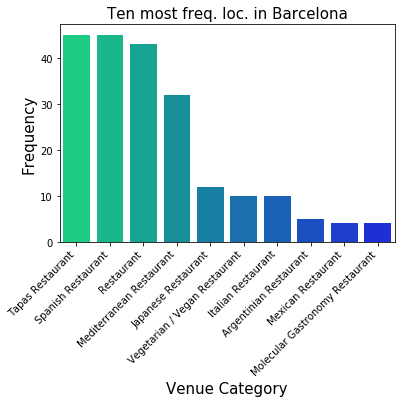

<Figure size 1296x504 with 0 Axes>

In [283]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=Barcelona_Venues_Top10, palette="winter_r")
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Ten most freq. loc. in Barcelona', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

In [285]:
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", Barcelona_Venues_only_restaurant.shape)
Barcelona_Venues_only_restaurant.head(75)

Shape of the Data-Frame with Venue Category only Restaurant:  (249, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Ciutat Vella,41.374985,2.173277,El Pachuco,41.376369,2.169148,Mexican Restaurant
2,Ciutat Vella,41.374985,2.173277,Cañete,41.379154,2.173092,Tapas Restaurant
3,Ciutat Vella,41.374985,2.173277,Palo Cortao,41.372803,2.167719,Tapas Restaurant
4,Ciutat Vella,41.374985,2.173277,La Monroe,41.378795,2.170692,Spanish Restaurant
5,Ciutat Vella,41.374985,2.173277,La Chana,41.374469,2.165774,Tapas Restaurant
6,Ciutat Vella,41.374985,2.173277,Quimet & Quimet,41.373997,2.165522,Tapas Restaurant
7,Ciutat Vella,41.374985,2.173277,Macchina Pasta Bar,41.380151,2.176847,Italian Restaurant
8,Ciutat Vella,41.374985,2.173277,Las Fernández,41.378183,2.166354,Mediterranean Restaurant
9,Ciutat Vella,41.374985,2.173277,Arume,41.378953,2.166008,Spanish Restaurant
10,Ciutat Vella,41.374985,2.173277,Cera 23,41.378947,2.166180,Spanish Restaurant


In [286]:
Barcelona_Venues_restaurant = Barcelona_Venues_only_restaurant.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())


In [287]:
Barcelona_Venues_restaurant


Neighborhood
Ciutat Vella           28
Eixample               27
Horta-Guinardó         29
Les Corts              37
Nou Barris             25
Sant Andreu            33
Sant Martí             30
Sants-Montjuïc         27
Sarrià-Sant Gervasi    13
Name: Venue Category, dtype: int64

In [288]:
Barcelona_Venues_restaurant_df  = Barcelona_Venues_restaurant.to_frame().reset_index()
Barcelona_Venues_restaurant_df.columns = ['Neighborhood', 'Number of Restaurant']
Barcelona_Venues_restaurant_df.index = np.arange(1, len(Barcelona_Venues_restaurant_df)+1)
list_rest_no =Barcelona_Venues_restaurant_df['Number of Restaurant'].to_list()
list_dist =Barcelona_Venues_restaurant_df['Neighborhood'].to_list()

## now we start to one hot encode the data

In [292]:
# one hot encoding
Barcelona_onehot = pd.get_dummies(Barcelona_Venues_only_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Barcelona_onehot['Neighborhood'] = Barcelona_Venues_only_restaurant['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Barcelona_onehot.columns[-1]] + list(Barcelona_onehot.columns[:-1])
Barcelona_onehot = Barcelona_onehot[fixed_columns]

Barcelona_onehot.head()

,Neighborhood,African Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant,Gluten-free Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Molecular Gastronomy Restaurant,Paella Restaurant,Pakistani Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,South American Restaurant,Spanish Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
1,Ciutat Vella,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Ciutat Vella,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,Ciutat Vella,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,Ciutat Vella,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,Ciutat Vella,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [294]:
# New dataframe size

Barcelona_onehot.shape

(249, 33)

In [295]:
# we set the mean as index

Barcelona_grouped = Barcelona_onehot.groupby('Neighborhood').mean().reset_index()
Barcelona_grouped

,Neighborhood,African Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant,Gluten-free Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Molecular Gastronomy Restaurant,Paella Restaurant,Pakistani Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,South American Restaurant,Spanish Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Ciutat Vella,0.000000,0.071429,0.000000,0.000000,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035714,0.035714,0.000000,0.107143,0.107143,0.000000,0.000000,0.000000,0.000000,0.000000,0.035714,0.035714,0.000000,0.000000,0.250000,0.000000,0.214286,0.000000,0.071429,0.000000
1,Eixample,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.148148,0.000000,0.148148,0.000000,0.000000,0.000000,0.000000,0.037037,0.037037,0.111111,0.037037,0.000000,0.000000,0.185185,0.000000,0.185185,0.037037,0.074074,0.000000
2,Horta-Guinardó,0.000000,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034483,0.000000,0.000000,0.034483,0.034483,0.000000,0.137931,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,0.172414,0.000000,0.000000,0.000000,0.275862,0.000000,0.172414,0.034483,0.034483,0.000000
3,Les Corts,0.027027,0.000000,0.027027,0.000000,0.000000,0.000000,0.027027,0.000000,0.000000,0.000000,0.027027,0.027027,0.000000,0.162162,0.000000,0.162162,0.000000,0.000000,0.000000,0.027027,0.000000,0.027027,0.189189,0.027027,0.000000,0.000000,0.108108,0.000000,0.081081,0.054054,0.027027,0.000000
4,Nou Barris,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.040000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.200000,0.000000,0.360000,0.000000,0.040000,0.000000
5,Sant Andreu,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,0.000000,0.030303,0.000000,0.030303,0.000000,0.000000,0.090909,0.000000,0.000000,0.030303,0.000000,0.030303,0.000000,0.000000,0.000000,0.000000,0.242424,0.000000,0.000000,0.000000,0.121212,0.030303,0.333333,0.000000,0.030303,0.000000
6,Sant Martí,0.000000,0.033333,0.033333,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.133333,0.000000,0.033333,0.166667,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.033333,0.166667,0.000000,0.033333,0.000000,0.066667,0.033333
7,Sants-Montjuïc,0.000000,0.037037,0.037037,0.000000,0.074074,0.037037,0.000000,0.000000,0.037037,0.000000,0.000000,0.000000,0.037037,0.000000,0.000000,0.185185,0.000000,0.074074,0.000000,0.000000,0.000000,0.000000,0.222222,0.000000,0.037037,0.000000,0.148148,0.000000,0.074074,0.000000,0.000000,0.000000
8,Sarrià-Sant Gervasi,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230769,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230769,0.000000,0.000000,0.000000,0.230769,0.076923,0.230769,0.000000,0.000000,0.000000


In [296]:
Barcelona_grouped.shape


(9, 33)

In [306]:
# now we can see how much percent the corresponding category is above the mean of the district
# we get a really good representation of the data, descending
num_top_venues = 10

for hood in Barcelona_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Barcelona_grouped[Barcelona_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ciutat Vella----
                           venue  freq
0             Spanish Restaurant  0.25
1               Tapas Restaurant  0.21
2             Mexican Restaurant  0.11
3       Mediterranean Restaurant  0.11
4  Vegetarian / Vegan Restaurant  0.07
5         Argentinian Restaurant  0.07
6             Italian Restaurant  0.04
7        Comfort Food Restaurant  0.04
8            Japanese Restaurant  0.04
9             Seafood Restaurant  0.04


----Eixample----
                           venue  freq
0               Tapas Restaurant  0.19
1             Spanish Restaurant  0.19
2       Mediterranean Restaurant  0.15
3            Japanese Restaurant  0.15
4                     Restaurant  0.11
5  Vegetarian / Vegan Restaurant  0.07
6          Portuguese Restaurant  0.04
7                Thai Restaurant  0.04
8             Seafood Restaurant  0.04
9               Ramen Restaurant  0.04


----Horta-Guinardó----
                      venue  freq
0        Spanish Restaurant  0.28
1        

In [304]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [309]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Barcelona_grouped['Neighborhood']

for ind in np.arange(Barcelona_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Barcelona_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(9)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ciutat Vella,Spanish Restaurant,Tapas Restaurant,Mediterranean Restaurant,Mexican Restaurant,Argentinian Restaurant,Vegetarian / Vegan Restaurant,Restaurant,Japanese Restaurant,Comfort Food Restaurant,Seafood Restaurant
1,Eixample,Tapas Restaurant,Spanish Restaurant,Mediterranean Restaurant,Japanese Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Portuguese Restaurant,Ramen Restaurant,Thai Restaurant
2,Horta-Guinardó,Spanish Restaurant,Restaurant,Tapas Restaurant,Mediterranean Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Mexican Restaurant,German Restaurant,Italian Restaurant,Argentinian Restaurant
3,Les Corts,Restaurant,Mediterranean Restaurant,Japanese Restaurant,Spanish Restaurant,Tapas Restaurant,Thai Restaurant,Pakistani Restaurant,Asian Restaurant,Ethiopian Restaurant,Gluten-free Restaurant
4,Nou Barris,Tapas Restaurant,Restaurant,Spanish Restaurant,Falafel Restaurant,Vegetarian / Vegan Restaurant,Molecular Gastronomy Restaurant,German Restaurant,Mediterranean Restaurant,Chinese Restaurant,Comfort Food Restaurant
5,Sant Andreu,Tapas Restaurant,Restaurant,Spanish Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,German Restaurant,Molecular Gastronomy Restaurant,Falafel Restaurant,Mediterranean Restaurant,Chinese Restaurant
6,Sant Martí,Mediterranean Restaurant,Spanish Restaurant,Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Paella Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Comfort Food Restaurant
7,Sants-Montjuïc,Restaurant,Mediterranean Restaurant,Spanish Restaurant,Tapas Restaurant,Chinese Restaurant,Molecular Gastronomy Restaurant,Argentinian Restaurant,Asian Restaurant,Shabu-Shabu Restaurant,Italian Restaurant
8,Sarrià-Sant Gervasi,Mediterranean Restaurant,Tapas Restaurant,Spanish Restaurant,Restaurant,Sushi Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Japanese Restaurant


# Machine Learning clustering starts 

In [321]:
# set number of clusters
# we use the method k-means as learned in a previous lab

kclusters = 3

Barcelona_grouped_clustering = Barcelona_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Barcelona_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 1, 2, 2, 1, 1, 0], dtype=int32)

In [322]:
Barcelona_merged = df
Barcelona_merged.head(10)

,Number,District,Neighbourhoods,Latitude,Longitude
0,1,Ciutat Vella,"La Barceloneta, El Gòtic, El Raval, Sant Pere,...",41.374985,2.173277
1,2,Eixample,"L'Antiga Esquerra de l'Eixample, La Nova Esque...",41.393689,2.163655
2,3,Sants-Montjuïc,"La Bordeta, la Font de la Guatlla, Hostafrancs...",41.340234,2.133348
3,4,Les Corts,"les Corts, la Maternitat i Sant Ramon, Pedralbes",41.385244,2.132863
4,5,Sarrià-Sant Gervasi,"El Putget i Farró, Sarrià, Sant Gervasi - la B...",41.413039,2.107620
5,6,Gràcia,"Vila de Gràcia, el Camp d'en Grassot i Gràcia ...",38.995368,21.987713
6,7,Horta-Guinardó,"El Baix Guinardó, El Guinardó, Can Baró, El Ca...",41.428556,2.143617
7,8,Nou Barris,"Can Peguera, Canyelles, Ciutat Meridiana, La G...",41.445815,2.179801
8,9,Sant Andreu,"Baró de Viver, Bon Pastor, El Congrés i els In...",41.437439,2.196859
9,10,Sant Martí,"El Besòs i el Maresme, el Clot, El Camp de l'A...",41.406782,2.203655


In [323]:
df.drop([5], inplace=True)
df

,Number,District,Neighbourhoods,Latitude,Longitude
0,1,Ciutat Vella,"La Barceloneta, El Gòtic, El Raval, Sant Pere,...",41.374985,2.173277
1,2,Eixample,"L'Antiga Esquerra de l'Eixample, La Nova Esque...",41.393689,2.163655
2,3,Sants-Montjuïc,"La Bordeta, la Font de la Guatlla, Hostafrancs...",41.340234,2.133348
3,4,Les Corts,"les Corts, la Maternitat i Sant Ramon, Pedralbes",41.385244,2.132863
4,5,Sarrià-Sant Gervasi,"El Putget i Farró, Sarrià, Sant Gervasi - la B...",41.413039,2.107620
6,7,Horta-Guinardó,"El Baix Guinardó, El Guinardó, Can Baró, El Ca...",41.428556,2.143617
7,8,Nou Barris,"Can Peguera, Canyelles, Ciutat Meridiana, La G...",41.445815,2.179801
8,9,Sant Andreu,"Baró de Viver, Bon Pastor, El Congrés i els In...",41.437439,2.196859
9,10,Sant Martí,"El Besòs i el Maresme, el Clot, El Camp de l'A...",41.406782,2.203655


In [324]:
neighborhoods_venues_sorted.head(9)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ciutat Vella,Spanish Restaurant,Tapas Restaurant,Mediterranean Restaurant,Mexican Restaurant,Argentinian Restaurant,Vegetarian / Vegan Restaurant,Restaurant,Japanese Restaurant,Comfort Food Restaurant,Seafood Restaurant
1,Eixample,Tapas Restaurant,Spanish Restaurant,Mediterranean Restaurant,Japanese Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Portuguese Restaurant,Ramen Restaurant,Thai Restaurant
2,Horta-Guinardó,Spanish Restaurant,Restaurant,Tapas Restaurant,Mediterranean Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Mexican Restaurant,German Restaurant,Italian Restaurant,Argentinian Restaurant
3,Les Corts,Restaurant,Mediterranean Restaurant,Japanese Restaurant,Spanish Restaurant,Tapas Restaurant,Thai Restaurant,Pakistani Restaurant,Asian Restaurant,Ethiopian Restaurant,Gluten-free Restaurant
4,Nou Barris,Tapas Restaurant,Restaurant,Spanish Restaurant,Falafel Restaurant,Vegetarian / Vegan Restaurant,Molecular Gastronomy Restaurant,German Restaurant,Mediterranean Restaurant,Chinese Restaurant,Comfort Food Restaurant
5,Sant Andreu,Tapas Restaurant,Restaurant,Spanish Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,German Restaurant,Molecular Gastronomy Restaurant,Falafel Restaurant,Mediterranean Restaurant,Chinese Restaurant
6,Sant Martí,Mediterranean Restaurant,Spanish Restaurant,Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Paella Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Comfort Food Restaurant
7,Sants-Montjuïc,Restaurant,Mediterranean Restaurant,Spanish Restaurant,Tapas Restaurant,Chinese Restaurant,Molecular Gastronomy Restaurant,Argentinian Restaurant,Asian Restaurant,Shabu-Shabu Restaurant,Italian Restaurant
8,Sarrià-Sant Gervasi,Mediterranean Restaurant,Tapas Restaurant,Spanish Restaurant,Restaurant,Sushi Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Japanese Restaurant


In [325]:
neighborhoods_venues_sorted_w_clusters = neighborhoods_venues_sorted


In [326]:
neighborhoods_venues_sorted_w_clusters.head(9)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ciutat Vella,Spanish Restaurant,Tapas Restaurant,Mediterranean Restaurant,Mexican Restaurant,Argentinian Restaurant,Vegetarian / Vegan Restaurant,Restaurant,Japanese Restaurant,Comfort Food Restaurant,Seafood Restaurant
1,Eixample,Tapas Restaurant,Spanish Restaurant,Mediterranean Restaurant,Japanese Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Portuguese Restaurant,Ramen Restaurant,Thai Restaurant
2,Horta-Guinardó,Spanish Restaurant,Restaurant,Tapas Restaurant,Mediterranean Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Mexican Restaurant,German Restaurant,Italian Restaurant,Argentinian Restaurant
3,Les Corts,Restaurant,Mediterranean Restaurant,Japanese Restaurant,Spanish Restaurant,Tapas Restaurant,Thai Restaurant,Pakistani Restaurant,Asian Restaurant,Ethiopian Restaurant,Gluten-free Restaurant
4,Nou Barris,Tapas Restaurant,Restaurant,Spanish Restaurant,Falafel Restaurant,Vegetarian / Vegan Restaurant,Molecular Gastronomy Restaurant,German Restaurant,Mediterranean Restaurant,Chinese Restaurant,Comfort Food Restaurant
5,Sant Andreu,Tapas Restaurant,Restaurant,Spanish Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,German Restaurant,Molecular Gastronomy Restaurant,Falafel Restaurant,Mediterranean Restaurant,Chinese Restaurant
6,Sant Martí,Mediterranean Restaurant,Spanish Restaurant,Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Paella Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Comfort Food Restaurant
7,Sants-Montjuïc,Restaurant,Mediterranean Restaurant,Spanish Restaurant,Tapas Restaurant,Chinese Restaurant,Molecular Gastronomy Restaurant,Argentinian Restaurant,Asian Restaurant,Shabu-Shabu Restaurant,Italian Restaurant
8,Sarrià-Sant Gervasi,Mediterranean Restaurant,Tapas Restaurant,Spanish Restaurant,Restaurant,Sushi Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Japanese Restaurant


In [327]:
neighborhoods_venues_sorted_w_clusters.insert(0, 'Cluster Labels', kmeans.labels_)


In [328]:
neighborhoods_venues_sorted_w_clusters.head(23)


,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Ciutat Vella,Spanish Restaurant,Tapas Restaurant,Mediterranean Restaurant,Mexican Restaurant,Argentinian Restaurant,Vegetarian / Vegan Restaurant,Restaurant,Japanese Restaurant,Comfort Food Restaurant,Seafood Restaurant
1,0,Eixample,Tapas Restaurant,Spanish Restaurant,Mediterranean Restaurant,Japanese Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Portuguese Restaurant,Ramen Restaurant,Thai Restaurant
2,0,Horta-Guinardó,Spanish Restaurant,Restaurant,Tapas Restaurant,Mediterranean Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Mexican Restaurant,German Restaurant,Italian Restaurant,Argentinian Restaurant
3,1,Les Corts,Restaurant,Mediterranean Restaurant,Japanese Restaurant,Spanish Restaurant,Tapas Restaurant,Thai Restaurant,Pakistani Restaurant,Asian Restaurant,Ethiopian Restaurant,Gluten-free Restaurant
4,2,Nou Barris,Tapas Restaurant,Restaurant,Spanish Restaurant,Falafel Restaurant,Vegetarian / Vegan Restaurant,Molecular Gastronomy Restaurant,German Restaurant,Mediterranean Restaurant,Chinese Restaurant,Comfort Food Restaurant
5,2,Sant Andreu,Tapas Restaurant,Restaurant,Spanish Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,German Restaurant,Molecular Gastronomy Restaurant,Falafel Restaurant,Mediterranean Restaurant,Chinese Restaurant
6,1,Sant Martí,Mediterranean Restaurant,Spanish Restaurant,Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Paella Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Comfort Food Restaurant
7,1,Sants-Montjuïc,Restaurant,Mediterranean Restaurant,Spanish Restaurant,Tapas Restaurant,Chinese Restaurant,Molecular Gastronomy Restaurant,Argentinian Restaurant,Asian Restaurant,Shabu-Shabu Restaurant,Italian Restaurant
8,0,Sarrià-Sant Gervasi,Mediterranean Restaurant,Tapas Restaurant,Spanish Restaurant,Restaurant,Sushi Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Japanese Restaurant


# we now merge both colums
## first the prior column with the data and second the one hot encoded and now descending sorted data

In [329]:
Barcelona_merged.rename(columns={'Disctrict':'Neighborhood'}, inplace=True)

Barcelona_merged = Barcelona_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='District')

Barcelona_merged.head(10)

,Number,District,Neighbourhoods,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Ciutat Vella,"La Barceloneta, El Gòtic, El Raval, Sant Pere,...",41.374985,2.173277,0,Spanish Restaurant,Tapas Restaurant,Mediterranean Restaurant,Mexican Restaurant,Argentinian Restaurant,Vegetarian / Vegan Restaurant,Restaurant,Japanese Restaurant,Comfort Food Restaurant,Seafood Restaurant
1,2,Eixample,"L'Antiga Esquerra de l'Eixample, La Nova Esque...",41.393689,2.163655,0,Tapas Restaurant,Spanish Restaurant,Mediterranean Restaurant,Japanese Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Portuguese Restaurant,Ramen Restaurant,Thai Restaurant
2,3,Sants-Montjuïc,"La Bordeta, la Font de la Guatlla, Hostafrancs...",41.340234,2.133348,1,Restaurant,Mediterranean Restaurant,Spanish Restaurant,Tapas Restaurant,Chinese Restaurant,Molecular Gastronomy Restaurant,Argentinian Restaurant,Asian Restaurant,Shabu-Shabu Restaurant,Italian Restaurant
3,4,Les Corts,"les Corts, la Maternitat i Sant Ramon, Pedralbes",41.385244,2.132863,1,Restaurant,Mediterranean Restaurant,Japanese Restaurant,Spanish Restaurant,Tapas Restaurant,Thai Restaurant,Pakistani Restaurant,Asian Restaurant,Ethiopian Restaurant,Gluten-free Restaurant
4,5,Sarrià-Sant Gervasi,"El Putget i Farró, Sarrià, Sant Gervasi - la B...",41.413039,2.107620,0,Mediterranean Restaurant,Tapas Restaurant,Spanish Restaurant,Restaurant,Sushi Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Japanese Restaurant
6,7,Horta-Guinardó,"El Baix Guinardó, El Guinardó, Can Baró, El Ca...",41.428556,2.143617,0,Spanish Restaurant,Restaurant,Tapas Restaurant,Mediterranean Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Mexican Restaurant,German Restaurant,Italian Restaurant,Argentinian Restaurant
7,8,Nou Barris,"Can Peguera, Canyelles, Ciutat Meridiana, La G...",41.445815,2.179801,2,Tapas Restaurant,Restaurant,Spanish Restaurant,Falafel Restaurant,Vegetarian / Vegan Restaurant,Molecular Gastronomy Restaurant,German Restaurant,Mediterranean Restaurant,Chinese Restaurant,Comfort Food Restaurant
8,9,Sant Andreu,"Baró de Viver, Bon Pastor, El Congrés i els In...",41.437439,2.196859,2,Tapas Restaurant,Restaurant,Spanish Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,German Restaurant,Molecular Gastronomy Restaurant,Falafel Restaurant,Mediterranean Restaurant,Chinese Restaurant
9,10,Sant Martí,"El Besòs i el Maresme, el Clot, El Camp de l'A...",41.406782,2.203655,1,Mediterranean Restaurant,Spanish Restaurant,Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Paella Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Comfort Food Restaurant


In [330]:

# create a map with folium
map_restaurants10 = folium.Map(location=[latitude,longitude], tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

In [331]:
# set color scheme for the five clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

In [336]:
# add markers to the map
for lat, lon, poi, cluster in zip(Barcelona_merged['Latitude'], 
                                  Barcelona_merged['Longitude'], 
                                  Barcelona_merged['District'], 
                                  Barcelona_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[list_dist.index(poi)]*0.5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_restaurants10)

In [347]:
map_restaurants10

In [338]:
Barcelona_merged.loc[Barcelona_merged['Cluster Labels'] == 0, Barcelona_merged.columns[[1] + list(range(5, Barcelona_merged.shape[1]))]]


,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ciutat Vella,0,Spanish Restaurant,Tapas Restaurant,Mediterranean Restaurant,Mexican Restaurant,Argentinian Restaurant,Vegetarian / Vegan Restaurant,Restaurant,Japanese Restaurant,Comfort Food Restaurant,Seafood Restaurant
1,Eixample,0,Tapas Restaurant,Spanish Restaurant,Mediterranean Restaurant,Japanese Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Portuguese Restaurant,Ramen Restaurant,Thai Restaurant
4,Sarrià-Sant Gervasi,0,Mediterranean Restaurant,Tapas Restaurant,Spanish Restaurant,Restaurant,Sushi Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Japanese Restaurant
6,Horta-Guinardó,0,Spanish Restaurant,Restaurant,Tapas Restaurant,Mediterranean Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Mexican Restaurant,German Restaurant,Italian Restaurant,Argentinian Restaurant


### we can call the first (above) cluster the core-spanish cluster with spanish restaurants and tapas

In [346]:
Barcelona_merged.loc[Barcelona_merged['Cluster Labels'] == 1, Barcelona_merged.columns[[1] + list(range(5, Barcelona_merged.shape[1]))]]


,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Sants-Montjuïc,1,Restaurant,Mediterranean Restaurant,Spanish Restaurant,Tapas Restaurant,Chinese Restaurant,Molecular Gastronomy Restaurant,Argentinian Restaurant,Asian Restaurant,Shabu-Shabu Restaurant,Italian Restaurant
3,Les Corts,1,Restaurant,Mediterranean Restaurant,Japanese Restaurant,Spanish Restaurant,Tapas Restaurant,Thai Restaurant,Pakistani Restaurant,Asian Restaurant,Ethiopian Restaurant,Gluten-free Restaurant
9,Sant Martí,1,Mediterranean Restaurant,Spanish Restaurant,Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Paella Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Comfort Food Restaurant


### we can call the first (above) cluster the mediterranean cluster

In [340]:
Barcelona_merged.loc[Barcelona_merged['Cluster Labels'] == 2, Barcelona_merged.columns[[1] + list(range(5, Barcelona_merged.shape[1]))]]


,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Nou Barris,2,Tapas Restaurant,Restaurant,Spanish Restaurant,Falafel Restaurant,Vegetarian / Vegan Restaurant,Molecular Gastronomy Restaurant,German Restaurant,Mediterranean Restaurant,Chinese Restaurant,Comfort Food Restaurant
8,Sant Andreu,2,Tapas Restaurant,Restaurant,Spanish Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,German Restaurant,Molecular Gastronomy Restaurant,Falafel Restaurant,Mediterranean Restaurant,Chinese Restaurant


### we can call the first (above) cluster the tapas cluster with falafel and vegetarian restaurants

## we do not have a fourth and fifth cluster here but we could just add them to the number of clusters
## since i want the data to be really distinct, i chose a low number of clusters

In [341]:
Barcelona_merged.loc[Barcelona_merged['Cluster Labels'] == 3, Barcelona_merged.columns[[1] + list(range(5, Barcelona_merged.shape[1]))]]


,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [342]:
Barcelona_merged.loc[Barcelona_merged['Cluster Labels'] == 4, Barcelona_merged.columns[[1] + list(range(5, Barcelona_merged.shape[1]))]]


,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
